# Kollokasjoner for nøkkelord

3. Vise og kommentere kollokasjonclusteret til begrepet helse. Kollokasjoner for “environment”, “social”, “life”, “body”, “security”, “risk”, and “care”, “services”, “education”, “sport”, “nutrition”, “children”, and “adolescence”.



In [84]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [85]:
css()

In [86]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [87]:
import pandas as pd

In [88]:
import ast

In [89]:
#colls_before = pd.read_json('demokrati_before.json')

In [90]:
import warnings
warnings.filterwarnings('ignore')

In [91]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [92]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [94]:
reference = pd.read_json('avis_agg_sample_20.json')

In [95]:
keyword = 'miljø'

## Grafstruktur topos

In [96]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [97]:
comm = gnl.community_dict(keyword_graph)

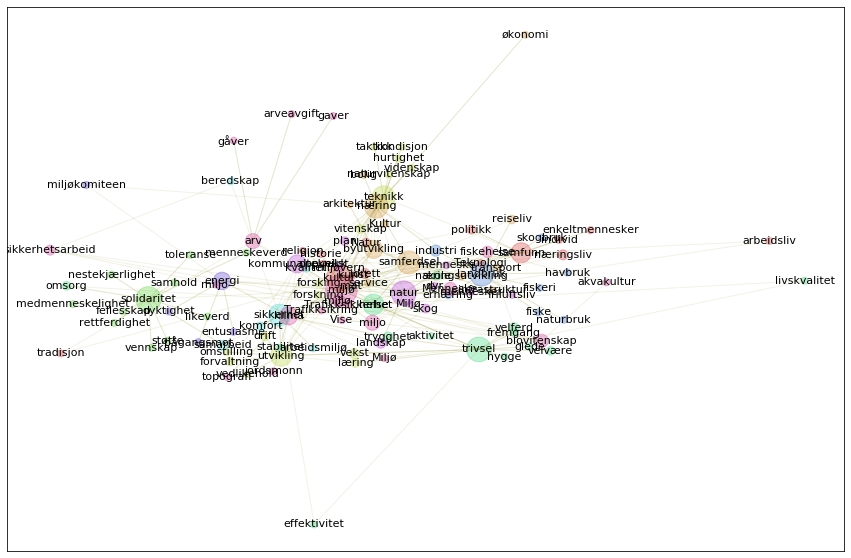

In [98]:
gnl.show_graph(keyword_graph, spread=0.8, fontsize=11)

In [99]:
keyword_cliques = cliques(keyword_graph)

# Grafens klikkstruktur (klikk = clique)

Klikkstrukturen er fin for å se overlapp og forskjellige kontekster hvor nøkkelordet forekommer. 

In [100]:
for i in keyword_cliques:
    mu.printmd("<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ' ,'.join(i)))

<span style='font-size:1.1em'>aktivitet ,helse ,økonomi ,kunst ,Natur ,kommunalteknikk ,forvaltning ,industri ,skole ,sikkerhet ,teknikk ,velferd ,livskvalitet ,drift ,samferdsel ,næring ,næringsliv ,utvikling ,idrett ,energi ,læring ,Kultur ,kultur ,Menneske ,vekst ,byutvikling ,miljo ,dyr ,trivsel ,næringsutvikling ,velvære ,skog ,landbruk ,plan ,miljø- ,landskap ,miljø ,klima ,samfunn ,natur</span>

<span style='font-size:1.1em'>helse ,samferdsel ,landbruk ,næring ,kultur ,kommunalteknikk ,byutvikling ,miljø ,utvikling ,natur</span>

<span style='font-size:1.1em'>byutvikling ,miljø ,samferdsel ,næring ,kultur</span>

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [101]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### teknikk-utvikling
<span style='font-size:1.1em'>teknikk, utvikling, vekst, læring, drift, forvaltning, vitenskap, videnskap, vedlikehold, naturvitenskap, kondisjon, omstilling, taktikk, hurtighet, forsking, forskning</span>
### solidaritet-vennskap
<span style='font-size:1.1em'>solidaritet, vennskap, medmenneskelighet, nestekjærlighet, likeverd, menneskeverd, støtte, samhold, rettferdighet, toleranse, fellesskap</span>
### trivsel-helse
<span style='font-size:1.1em'>trivsel, helse, trygghet, velferd, velvære, skole, omsorg, mat, aktivitet, glede, effektivitet, livskvalitet, fremgang, hygge</span>
### sikkerhet-samarbeid
<span style='font-size:1.1em'>sikkerhet, samarbeid, komfort, kvalitet, beredskap, arbeidsmiljø, stabilitet</span>
### landbruk-industri
<span style='font-size:1.1em'>landbruk, industri, naturbruk, havbruk, skogbruk, fiske, fiskeri, ernæring</span>
### miljø-klima
<span style='font-size:1.1em'>miljø, klima, energi, arv, miljo, biovitenskap, Menneske, miljø-, fiskehelse, sikkerhetsarbeid, pågangsmot, Trafikksikring, gåver, topografi, dyktighet, gaver, Trafikksikkerhet, miljo-, miljøkomiteen, jordsmonn, akvakultur, arveavgift, Vise, entusiasme, Miljø</span>
### natur-kommunalteknikk
<span style='font-size:1.1em'>natur, kommunalteknikk, landskap, skog, plan, miljøvern, Miljø-, friluftsliv, menneske, mennesker, dyr</span>
### kultur-samfunn
<span style='font-size:1.1em'>kultur, samfunn, idrett, næringsliv, Natur, politikk, tradisjon, enkeltmennesker, kunst, individ, arbeidsliv, Teknologi, religion, historie, oppvekst</span>
### næring-samferdsel
<span style='font-size:1.1em'>næring, samferdsel, byutvikling, reiseliv, næringsutvikling, bolig, service, økonomi, transport, Kultur, arkitektur, infrastruktur</span>


# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


Her ser vi først på referansekorpuset, og validerer det. Det er gruppert på tiår.

In [102]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

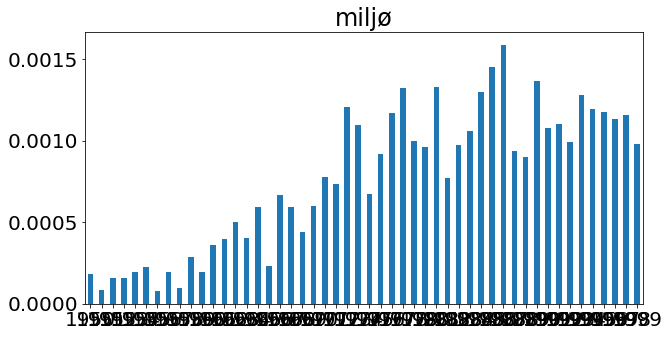

In [103]:
barchart(keyword, reference);

In [104]:
collocations = dict()
step = 1
for i in range(1950, 2000):
    try:
        collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom=i, yearto=i+step, before = 10, after = 10, corpus = 'avis')
        except:
            print("gir opp", i)

In [105]:
colls = nb.frame(collocations)

In [106]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [107]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [108]:
agg = group_frames(colls)

In [109]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

In [110]:
reference.sort_values(by=reference.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
.,1.39098,1.39011,1.32974,1.31876,1.31522,1.33115,1.32032,1.28226,1.31114,1.27826,1.22015,1.17079,1.23745,1.29461,1.28554,1.25099,1.2219,1.38504,1.24515,1.33251,1.29176,1.31627,1.22451,1.27574,1.24207,1.25917,1.21733,1.1969,1.21583,1.18739,1.29005,1.22005,1.24174,1.25352,1.30283,1.23567,1.3153,1.36488,1.40242,1.3226,1.35333,1.39079,1.41228,1.39136,1.29477,1.33864,1.28848,1.37039,1.23171,1.41384
",",0.76954,0.856414,0.795358,0.881156,0.806442,0.743545,0.837655,0.742889,0.754299,0.87736,0.786793,0.820144,0.748338,0.786501,0.871437,0.87292,0.836479,1.0084,0.7684,0.839177,0.735266,0.729174,0.686146,0.724146,0.737229,0.71974,0.718431,0.71361,0.667856,0.701938,0.769266,0.702013,0.738465,0.742419,0.720979,0.725155,0.80166,0.77114,0.787629,0.672002,0.640604,0.717421,0.785378,0.77462,0.758297,0.747596,0.740608,0.754163,0.731341,0.706799
i,0.448572,0.490718,0.494876,0.505146,0.495696,0.493653,0.501771,0.561204,0.493934,0.468949,0.520136,0.499579,0.500054,0.493851,0.517313,0.497924,0.500399,0.485552,0.496983,0.497255,0.494801,0.503126,0.50562,0.477942,0.492472,0.470903,0.490651,0.453728,0.479439,0.459831,0.461423,0.477404,0.446913,0.464701,0.445798,0.449428,0.410621,0.437679,0.411688,0.438477,0.440603,0.437625,0.396097,0.399638,0.407435,0.409982,0.426179,0.419586,0.406545,0.39061
og,0.383426,0.464821,0.411131,0.463728,0.430163,0.479666,0.392801,0.386091,0.413687,0.394402,0.425193,0.435716,0.444428,0.438936,0.442386,0.418031,0.439723,0.395065,0.414101,0.424339,0.344844,0.364508,0.398127,0.367014,0.37332,0.356991,0.412768,0.355218,0.400409,0.374849,0.3646,0.365743,0.36416,0.405785,0.403822,0.385317,0.373198,0.377977,0.33959,0.348051,0.322756,0.288004,0.348158,0.348168,0.298878,0.303044,0.343276,0.342268,0.354872,0.32353
er,0.218263,0.244129,0.227565,0.237595,0.235194,0.25221,0.22493,0.22228,0.234139,0.211662,0.23289,0.224294,0.225517,0.224779,0.216897,0.217586,0.217856,0.209655,0.213175,0.206154,0.19566,0.198908,0.221664,0.212436,0.228091,0.211505,0.222451,0.220346,0.226186,0.210243,0.219563,0.223764,0.211004,0.229611,0.217844,0.210852,0.206027,0.228521,0.193161,0.20312,0.20104,0.21487,0.190787,0.203987,0.202966,0.201665,0.191281,0.20129,0.206863,0.188951
det,0.211415,0.241213,0.227533,0.229656,0.23466,0.255584,0.217595,0.209046,0.230751,0.205705,0.234179,0.222644,0.232854,0.21727,0.206074,0.210301,0.225333,0.179355,0.202696,0.181327,0.175721,0.176576,0.195948,0.195361,0.202018,0.188615,0.208865,0.191718,0.194573,0.184479,0.194055,0.18228,0.176611,0.193236,0.172973,0.162115,0.166243,0.171335,0.147281,0.153739,0.153724,0.159661,0.134479,0.146996,0.13992,0.1407,0.126959,0.134905,0.145275,0.132223
til,0.211294,0.246022,0.225881,0.250039,0.228036,0.246956,0.230689,0.230958,0.23702,0.215457,0.243444,0.230365,0.251778,0.230768,0.230874,0.214544,0.228794,0.204417,0.224576,0.208807,0.221851,0.204496,0.217234,0.22028,0.226254,0.221014,0.222756,0.212368,0.21053,0.212503,0.225126,0.221852,0.21734,0.225401,0.21404,0.200512,0.19886,0.198167,0.177525,0.19539,0.187288,0.193843,0.180282,0.173306,0.176025,0.175332,0.181045,0.175954,0.177338,0.171895
av,0.185768,0.210382,0.19872,0.210461,0.197723,0.199487,0.200058,0.182342,0.192366,0.189662,0.200122,0.186039,0.190749,0.198935,0.20195,0.197942,0.201319,0.186709,0.197593,0.181895,0.18721,0.183224,0.190604,0.181473,0.183229,0.183522,0.177917,0.185628,0.180499,0.171443,0.172337,0.1697,0.165983,0.171711,0.168311,0.161372,0.158221,0.166031,0.144714,0.149101,0.14809,0.150793,0.142778,0.141303,0.13673,0.137954,0.128789,0.131942,0.142408,0.132305
som,0.184538,0.216867,0.196289,0.218786,0.204427,0.217225,0.205257,0.193064,0.207225,0.193287,0.221764,0.2004,0.212438,0.206862,0.203928,0.215046,0.209196,0.18701,0.198748,0.181824,0.187924,0.18537,0.194704,0.188052,0.197147,0.

In [111]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0509732,0.0600621,0.0612432,0.0611871,0.0589431
og,0.0356468,0.0376669,0.0389518,0.0415444,0.0442715
i,0.0350394,0.0354287,0.0346302,0.0334129,0.0312528
",",0.038911,0.0364922,0.0329794,0.0350069,0.0390344
et,0.0230471,0.024048,0.0215533,0.0225354,0.0211205
det,0.0195875,0.0161617,0.0146251,0.0120363,0.00999528
er,0.0180661,0.0150904,0.014244,0.0145511,0.0147532
som,0.0166738,0.0140845,0.0121995,0.011422,0.0107687
for,0.0104994,0.0105058,0.0116072,0.0122809,0.0137896
til,0.0110511,0.0109495,0.0111818,0.0111406,0.012045


In [113]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference[i]],axis=1).sum(axis=1))

In [114]:
nb.normalize_corpus_dataframe(pmi)

True

# Sammenligner med en referanse


<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [115]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
kristent,3.40302e-05,1.01687e-05,1.3357e-05,1.08935e-05,3.90764e-06
alkoholfritt,3.37002e-05,1.512e-05,1.29145e-05,5.04857e-06,5.29378e-06
eksotisk,3.35693e-05,1.18363e-05,1.08947e-05,1.11146e-05,2.48949e-06
stimulerende,3.35343e-05,1.43168e-05,1.15659e-05,1.08664e-05,6.47002e-06
fremmedartet,3.34889e-05,1.49608e-05,8.396e-06,4.21837e-06,6.71342e-06
barnets,3.32454e-05,2.34669e-06,2.89056e-06,1.07453e-05,6.82584e-06
intellektuelle,3.32142e-05,3.52453e-06,9.89851e-07,5.77784e-06,8.43509e-07
egenartet,3.314e-05,9.57669e-06,9.53887e-06,4.24589e-06,6.67749e-06
annenhver,3.30567e-05,1.51302e-05,3.49804e-06,3.83011e-06,7.35262e-07
intellektuelt,3.30404e-05,1.48626e-05,6.73084e-06,8.20351e-06,3.95668e-06


In [116]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(15).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
kristent,3.40302e-05,1.01687e-05,1.3357e-05,1.08935e-05,3.90764e-06
alkoholfritt,3.37002e-05,1.512e-05,1.29145e-05,5.04857e-06,5.29378e-06
eksotisk,3.35693e-05,1.18363e-05,1.08947e-05,1.11146e-05,2.48949e-06
stimulerende,3.35343e-05,1.43168e-05,1.15659e-05,1.08664e-05,6.47002e-06
fremmedartet,3.34889e-05,1.49608e-05,8.396e-06,4.21837e-06,6.71342e-06
barnets,3.32454e-05,2.34669e-06,2.89056e-06,1.07453e-05,6.82584e-06
intellektuelle,3.32142e-05,3.52453e-06,9.89851e-07,5.77784e-06,8.43509e-07
egenartet,3.314e-05,9.57669e-06,9.53887e-06,4.24589e-06,6.67749e-06
annenhver,3.30567e-05,1.51302e-05,3.49804e-06,3.83011e-06,7.35262e-07
intellektuelt,3.30404e-05,1.48626e-05,6.73084e-06,8.20351e-06,3.95668e-06


In [117]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
ekspansivt,3.23766e-05,1.57685e-05,1.32714e-05,1.07021e-05,7.0854e-06
trivelig,2.82211e-05,1.52773e-05,1.29642e-05,1.00381e-05,5.91177e-06
Kriminalserie,0,1.52305e-05,0,0,1.58347e-07
Boyer,3.06905e-05,1.52294e-05,1.28441e-05,0,6.43214e-06
kjeltringer,3.06905e-05,1.52055e-05,0,1.02244e-05,5.5941e-08
Excellent,0,1.51697e-05,0,0,0
utviklingsmuligheter,2.71417e-05,1.51455e-05,9.77865e-06,9.28094e-06,6.75614e-06
annenhver,3.30567e-05,1.51302e-05,3.49804e-06,3.83011e-06,7.35262e-07
alkoholfritt,3.37002e-05,1.512e-05,1.29145e-05,5.04857e-06,5.29378e-06
triveleg,3.16277e-05,1.507e-05,1.03472e-05,1.02724e-05,7.06743e-06


In [118]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Fotnoter,0,0,1.36299e-05,8.97073e-06,0
industrielt,2.73133e-05,1.44268e-05,1.35403e-05,7.31931e-06,4.45944e-06
ungdommelig,2.28519e-05,9.49092e-06,1.34926e-05,7.50066e-06,3.67934e-06
velferdstilbud,0,0,1.3418e-05,5.40115e-06,6.6874e-06
oppseding,1.03912e-05,1.41278e-05,1.33982e-05,1.15172e-06,3.58157e-08
Gruda,3.11189e-05,1.36087e-05,1.33806e-05,0,0
frilyndt,0,1.39913e-05,1.33806e-05,0,6.34358e-06
menneskevennlig,3.0268e-05,1.4449e-05,1.33788e-05,1.07541e-05,8.5507e-07
triveligere,3.09404e-05,1.44895e-05,1.33714e-05,8.60239e-06,1.85384e-06
voksent,9.68924e-06,1.42039e-05,1.33714e-05,4.02011e-06,1.60695e-06


In [119]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
rusfritt,0,0,1.30898e-05,1.14382e-05,6.37299e-06
kreativt,0,1.41278e-05,1.04697e-05,1.1403e-05,6.6659e-06
røykfritt,0,0,1.33219e-05,1.13695e-05,7.30162e-06
Verdenskommisjonen,0,0,0,1.13627e-05,7.15257e-06
skapa,2.97026e-05,9.12437e-06,8.74017e-06,1.1358e-05,7.03469e-06
Fylkeslistene,0,0,0,1.13465e-05,6.82229e-06
flyplass-,0,0,0,1.12975e-05,0
teknologiske,0,1.44562e-05,3.13578e-06,1.12889e-05,4.66527e-06
jordas,0,0,1.29043e-05,1.12508e-05,7.13248e-06
tøft,0,1.41488e-05,8.97663e-06,1.12352e-05,1.48618e-06


In [120]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(15).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
røykfritt,0,0,1.33219e-05,1.13695e-05,7.30162e-06
Utfordrende,0,0,7.72294e-06,1.05869e-05,7.28326e-06
pensjons-,9.36849e-06,1.02111e-05,7.06788e-06,8.16334e-06,7.28047e-06
Helse,0,5.25666e-07,1.32253e-05,3.46072e-06,7.26904e-06
arbeidsoppgaver,3.2569e-05,1.25327e-05,9.36563e-06,6.72767e-06,7.26062e-06
Heureka,0,0,0,0,7.20962e-06
lønnsbetingelser,3.11189e-05,1.47549e-05,1.24495e-05,8.73491e-06,7.20744e-06
FN-konferansen,0,0,1.21096e-05,1.10332e-05,7.195e-06
særpreget,2.64347e-05,1.50682e-05,7.78393e-06,1.03941e-05,7.15363e-06
Verdenskommisjonen,0,0,0,1.13627e-05,7.15257e-06


<br>
<br>

# Assosiasjoner og variasjon over år.

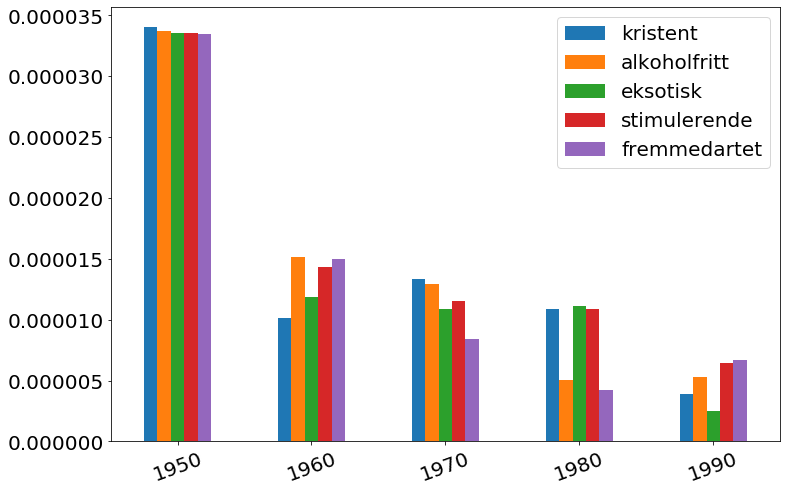

In [121]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [122]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

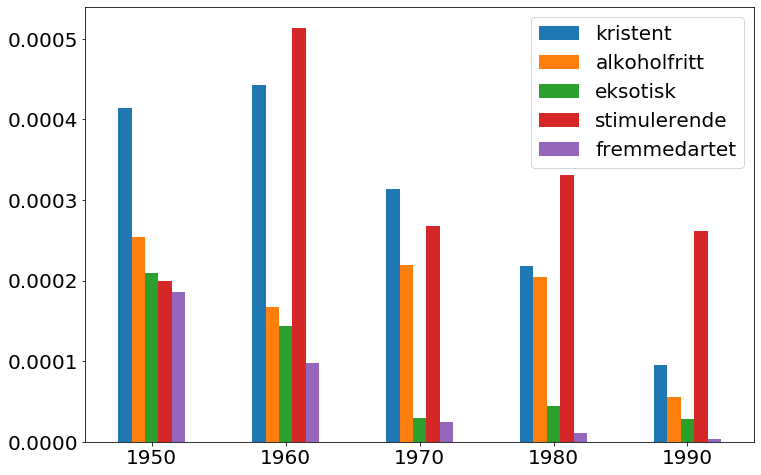

In [123]:
freq_assoc_val(agg, pmi, 0)

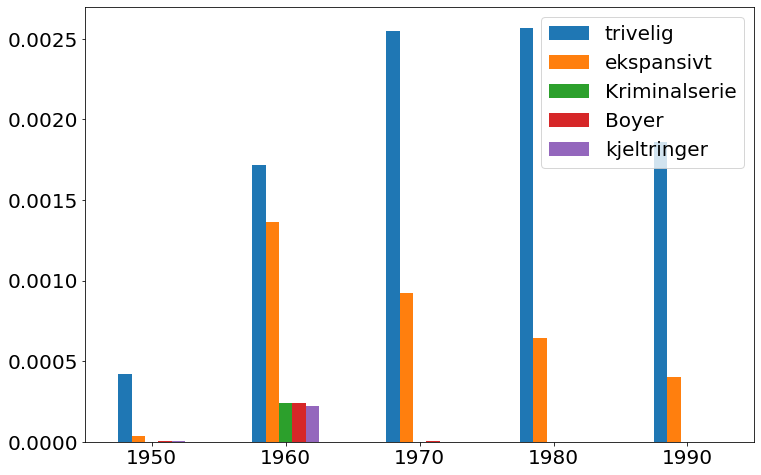

In [124]:
freq_assoc_val(agg, pmi, 1)

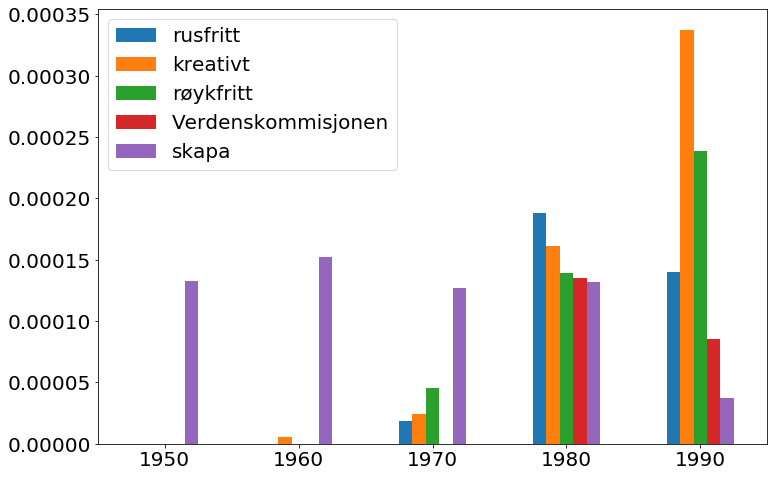

In [125]:
freq_assoc_val(agg, pmi, 3)

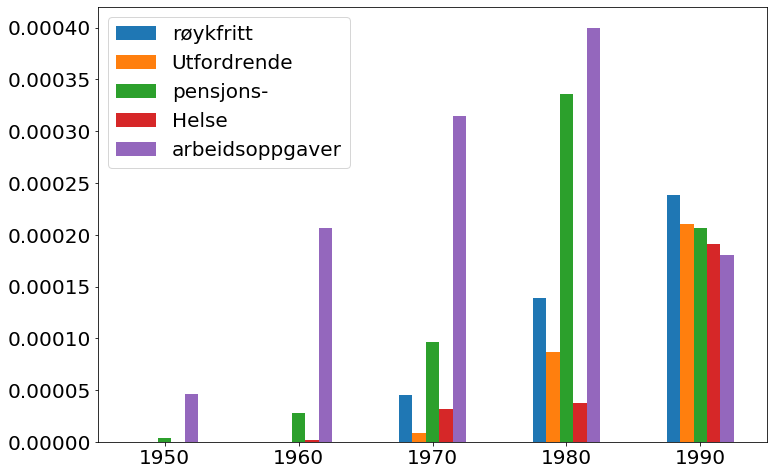

In [126]:
freq_assoc_val(agg, pmi, 4)

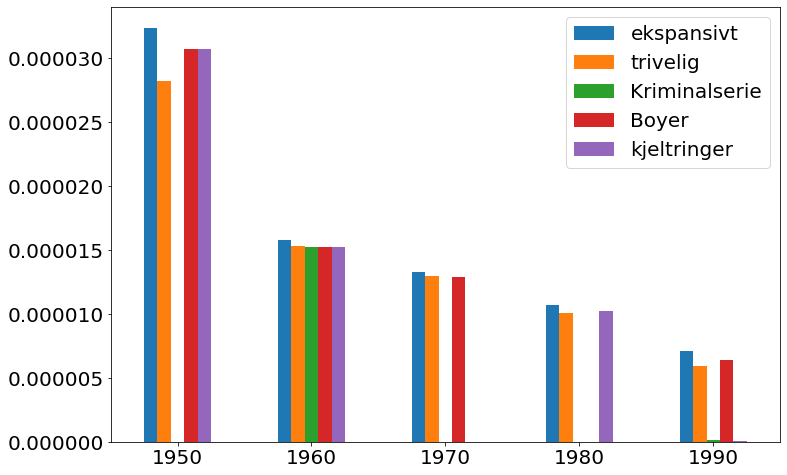

In [127]:
freq_assoc_val(pmi, pmi, 1)

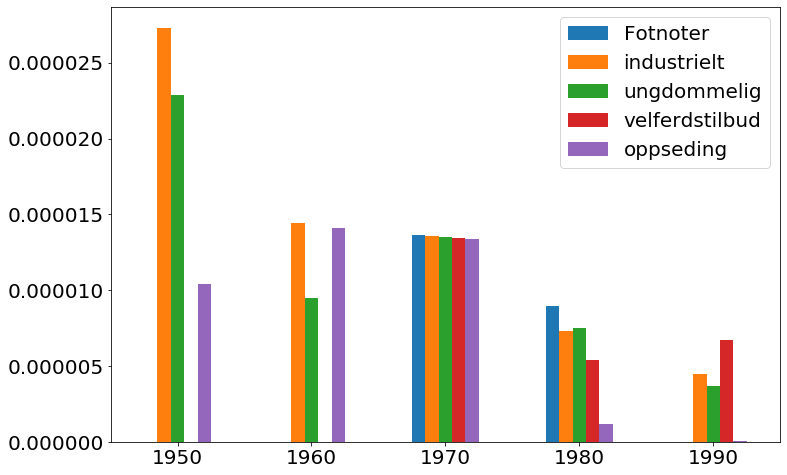

In [128]:
freq_assoc_val(pmi, pmi, 2)

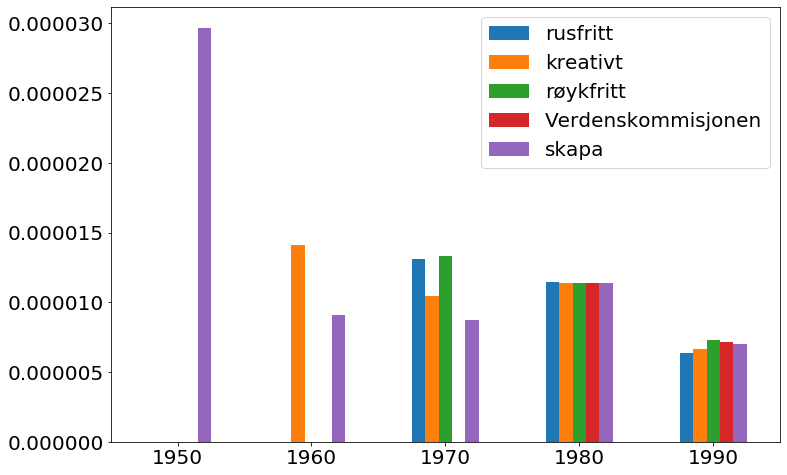

In [129]:
freq_assoc_val(pmi, pmi, 3)

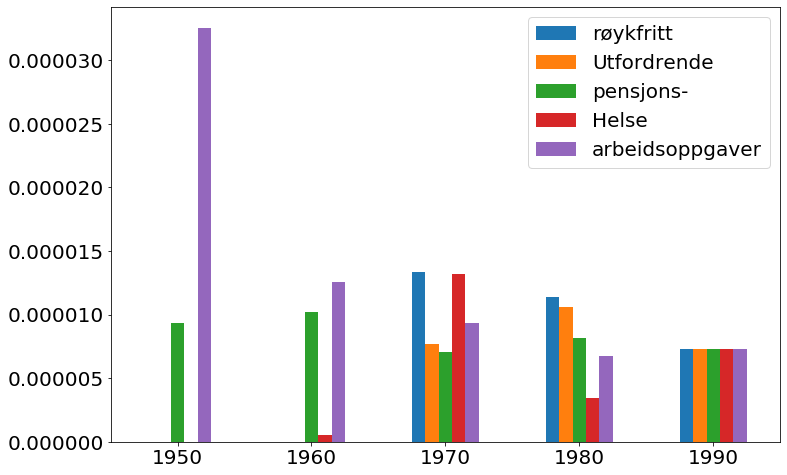

In [130]:
freq_assoc_val(pmi, pmi, 4)

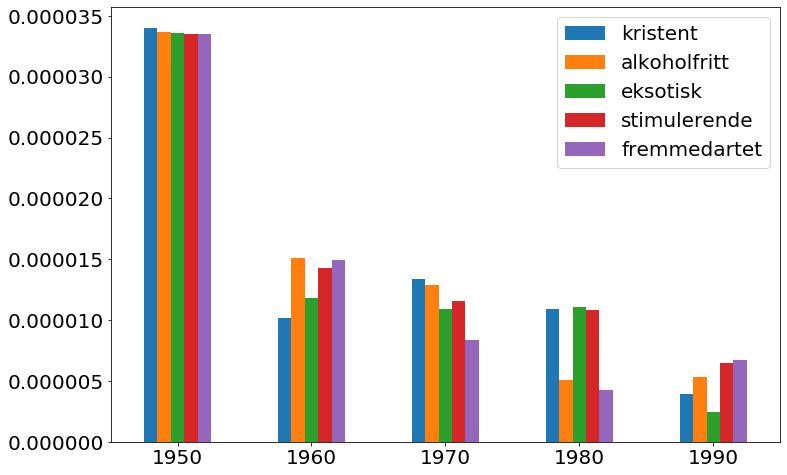

In [131]:
freq_assoc_val(pmi, pmi, 0)

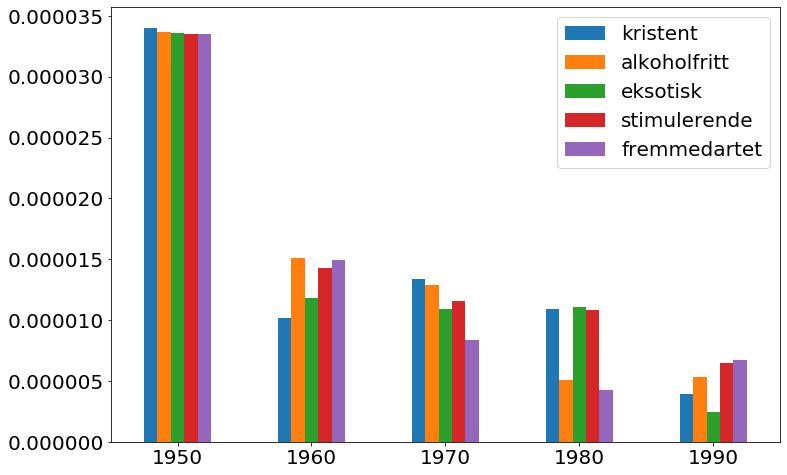

In [132]:
freq_assoc_val(pmi, pmi, 0)

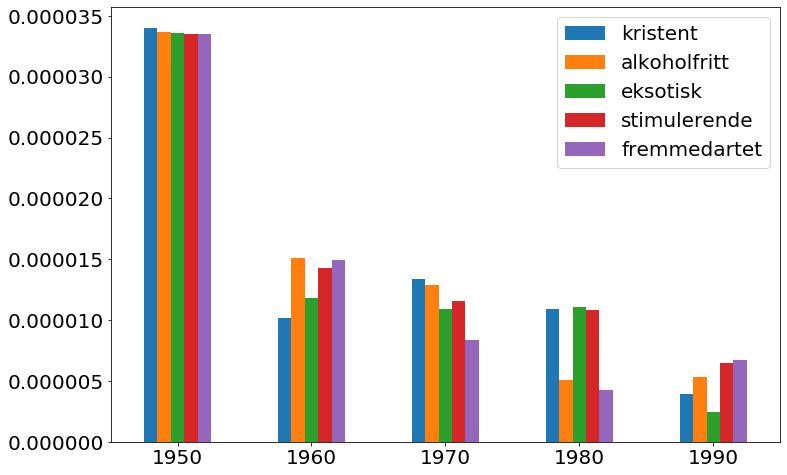

In [133]:
freq_assoc_val(pmi, pmi, 0)

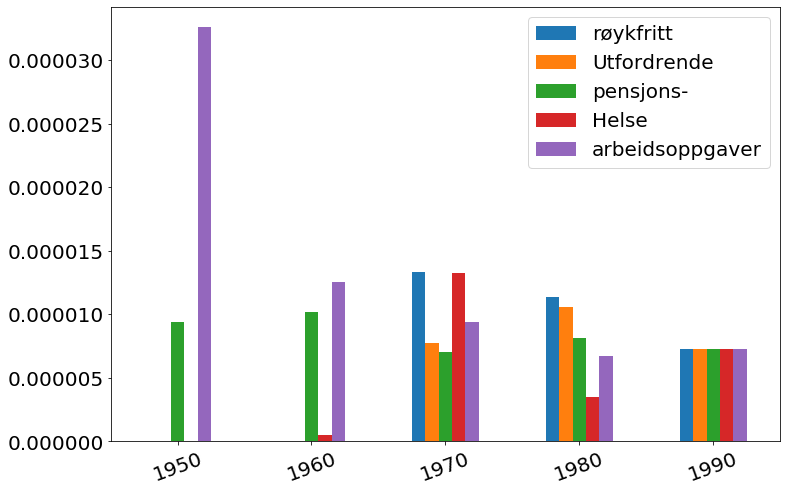

In [134]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

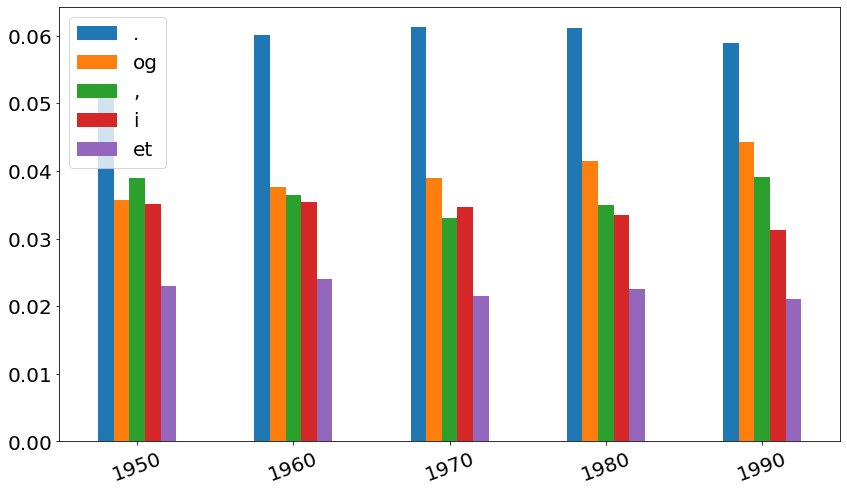

In [135]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden 1965-1980 sortert på ordklasser

In [136]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Fotnoter, Gruda, Lagnader, Miljøet, Alkoholfritt, Helse, Personalrabatt, Velordnede, Sentral, Tilrettelagt, Båtliv, Småplukk, Bustad, Hybelformidling, Baltikum, Songs, Fleksitid, Hagfelt, Copeland, Hensynet, Miljø, Britain, Skisse, Bankakademiet, Krevende, MEXI, Utenrikstjenestemenn, Ungdommelig, Biljard</span>

## adj
<span style='font-size:1.1em'>industrielt, ungdommelig, menneskevennlig, triveligere, voksent, barnevennlig, kristent, ekspansivt, tradisjonsrikt, snevert, avstressende, terapeutisk, tverrfaglig, terapeutiske, sundt, marint, litterært, eksterne, sterilt, sammensveiset, kristelig, sunne, urbant, religiøst, byggende, stressende, tilvante, landsens, beinhardt</span>
## unknown
<span style='font-size:1.1em'>velferdstilbud, oppseding, frilyndt, bevaring, arbeidsverktøy, svolten, røykfritt, avansemuligheter, fagleg, inspirerande, hyggeleg, døyr, teampreget, beidsforhold, rusgiftfritt, velig, heimleg, pansivt, tilleggspensjon, kontrastane, kundevennlig, pensjonistvennlige, byggesystem, kontaktaksjon, arbeidsfor-, barnebokforfattere</span>
## subst
<span style='font-size:1.1em'>fleksitid, arbeidsmiljøet, ressurs, utfordringer, livsstandard, religionene, forankring, møblene, trivnad, kriminalitet, omgangstone, pensjonsforsikring, vertinner</span>
## verb
<span style='font-size:1.1em'>gjenskape, inspirere, fyres</span>


# Hvordan utvikler ordene seg?

In [137]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

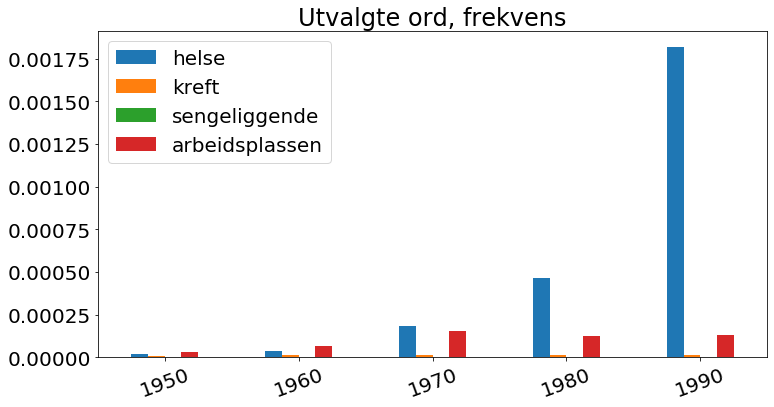

In [138]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

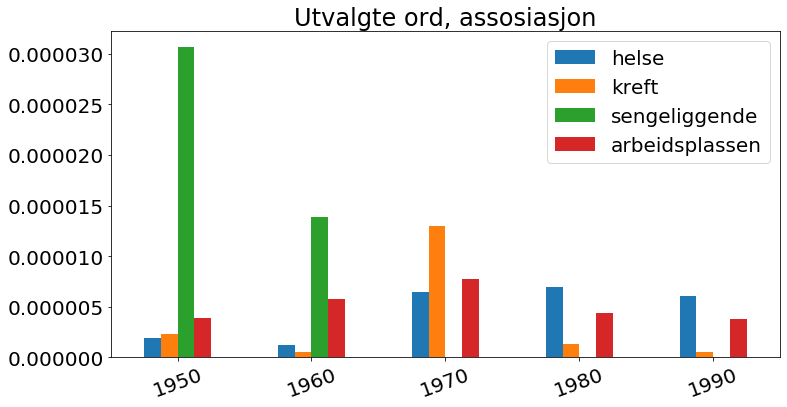

In [139]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

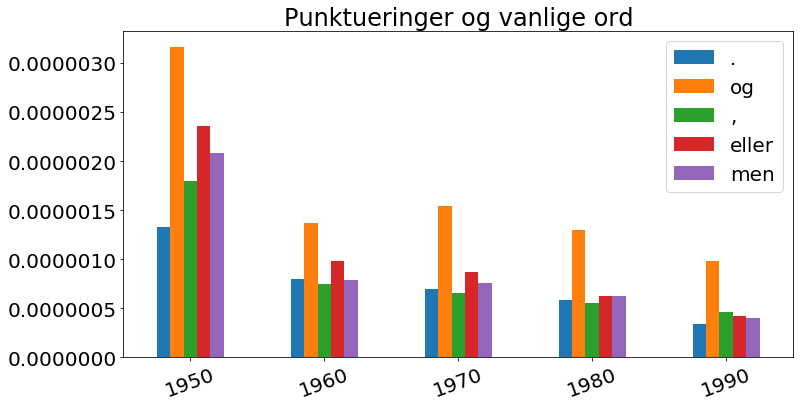

In [140]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

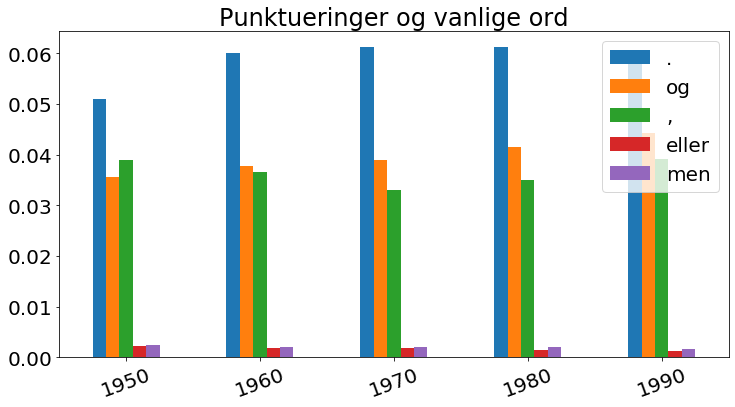

In [141]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [142]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

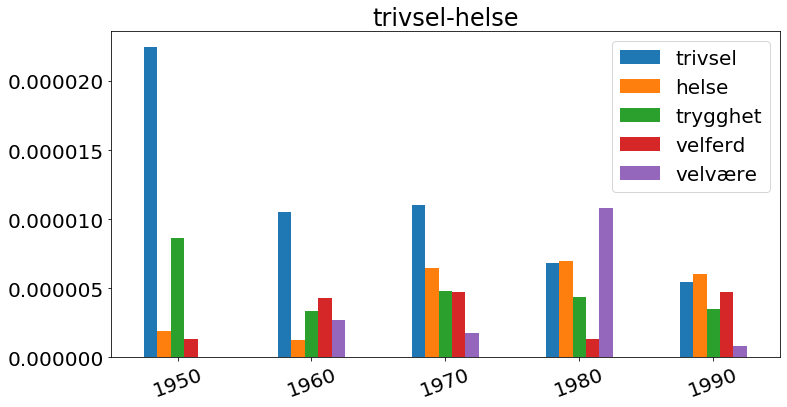

In [143]:
commchart(2, (0,5));

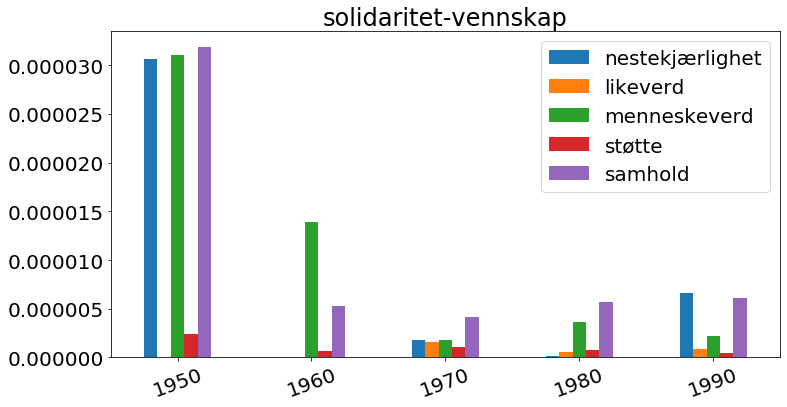

In [144]:
commchart(1, (3, 8))

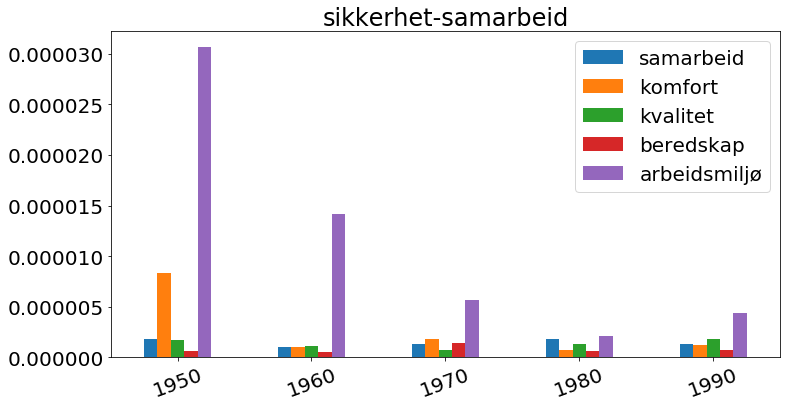

In [145]:
commchart(3)